In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from pathlib import Path
from re import compile as cp
from calendar import month_abbr
from os import mkdir, path

In [4]:
caminho_radar = Path('dados/radar/medicoes_dias')
caminho_tidi = Path('dados/tidi/medicoes_dias')

In [105]:
compilado = cp('[a-z]|[A-Z]')
ano = cp('\d\d\d\d')

In [106]:
dict_number_month = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}

In [206]:
def create_dataframe_by_year(caminho, tipo_radar, year, tipo_vento):
    arquivos = sorted([i for i in caminho.glob('*.txt')])
    df_medias = []

    for i in arquivos:
        df = pd.read_csv(i, sep='\s+')
        anos = str(i)[-10:-6]
        vento = str(i)

        if (year == anos) and (tipo_vento in vento):
            medias = df['90'].mean()
            medias = pd.DataFrame([medias], columns=[tipo_radar])

            df_medias.append(medias)
        else:
            continue

    return pd.concat(df_medias)


def join_dataframes(caminho_radar, caminho_tidi, year, tipo_vento):
    meses = dict_number_month.values()
    df_radar = create_dataframe_by_year(caminho_radar, 'SKiYMET', year, tipo_vento)
    df_tidi = create_dataframe_by_year(caminho_tidi, 'TIDI', year, tipo_vento)

    df = pd.concat([df_radar, df_tidi], axis=1, ignore_index=False)
    df['mes'] = meses
    df['ano'] = year
    
    return df 

In [212]:
df = join_dataframes(caminho_radar, caminho_tidi, '2006', 'zonal')

In [213]:
df

,SKiYMET,TIDI,mes,ano
0,-1.480417,-70.413363,Jan,2006
0,29.787917,26.131115,Feb,2006
0,-21.678182,-70.589050,Mar,2006
0,-19.049524,-8.917722,Apr,2006
0,-34.996667,-64.139313,May,2006
0,36.419545,4.730656,Jun,2006
0,3.517273,-40.073641,Jul,2006
0,18.615217,-32.867405,Aug,2006
0,25.713043,-20.918141,Sep,2006
0,-9.051739,-8.329097,Oct,2006


In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [215]:
df_plot = df.copy()

In [217]:
 # Set the style and font sizes
def multiline_plot_winds(caminho_radar, caminho_tidi, year, tipo_vento, titulo):

    df = join_dataframes(caminho_radar, caminho_tidi, year, tipo_vento)
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.set_style('ticks')
    plt.rcParams.update({'font.size': 12})
    
    # Create a Seaborn line plot with different markers for each product
    sns.lineplot(x='mes', y='SKiYMET', data=df, marker='o', color='navy', label='SKiYMET')
    sns.lineplot(x='mes', y='TIDI', data=df, marker='s', color='teal', label='TIDI')
    
    # Set plot title and axes labels
    plt.title('')
    plt.xlabel(year, fontsize=20)
    plt.ylabel(tipo_vento+' wind (m/s)', fontsize=16)
    
    # Add a legend
    plt.legend(loc='lower right')
    
    # Add a grid
    plt.grid(True)
    
    # Remove the top and right spines
    sns.despine()
    
    # Show the plot
    plt.savefig(f'dados/radar/figuras/{titulo}.png')
    plt.show()

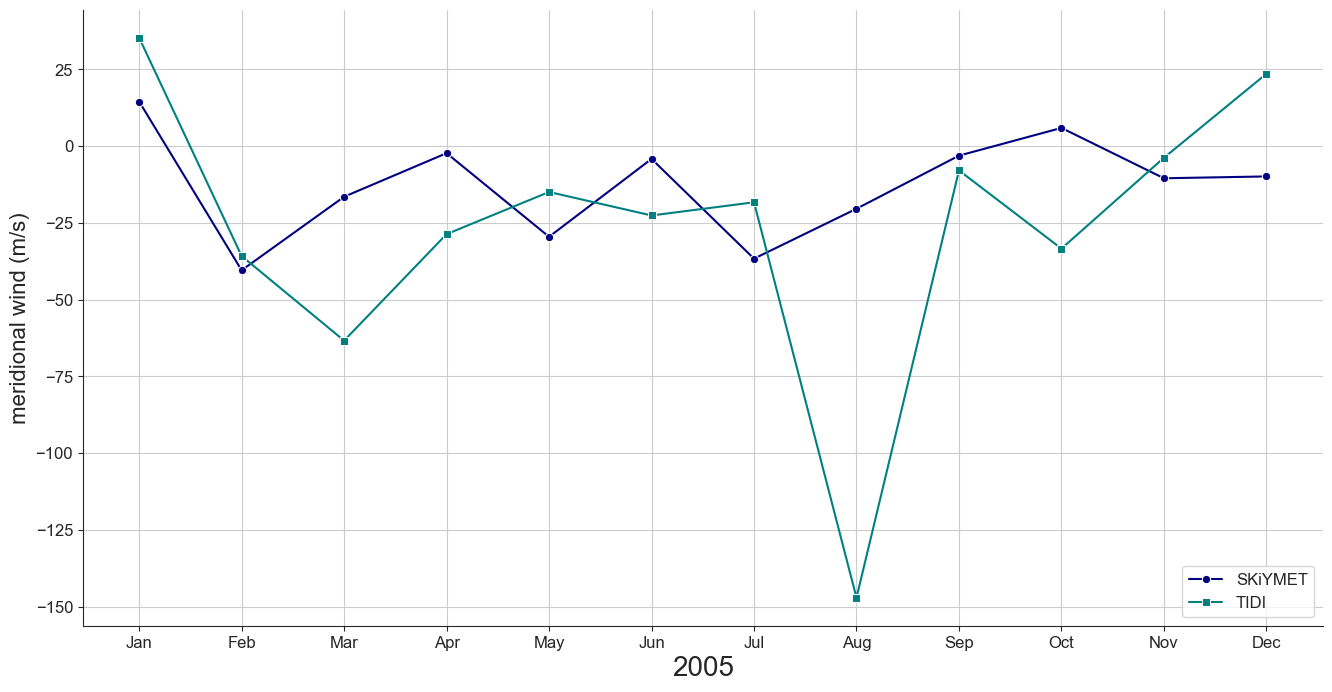

In [218]:
multiline_plot_winds(caminho_radar, caminho_tidi, '2005', 'meridional', 'comparacao_tidi_skiymet_meridional_2005')

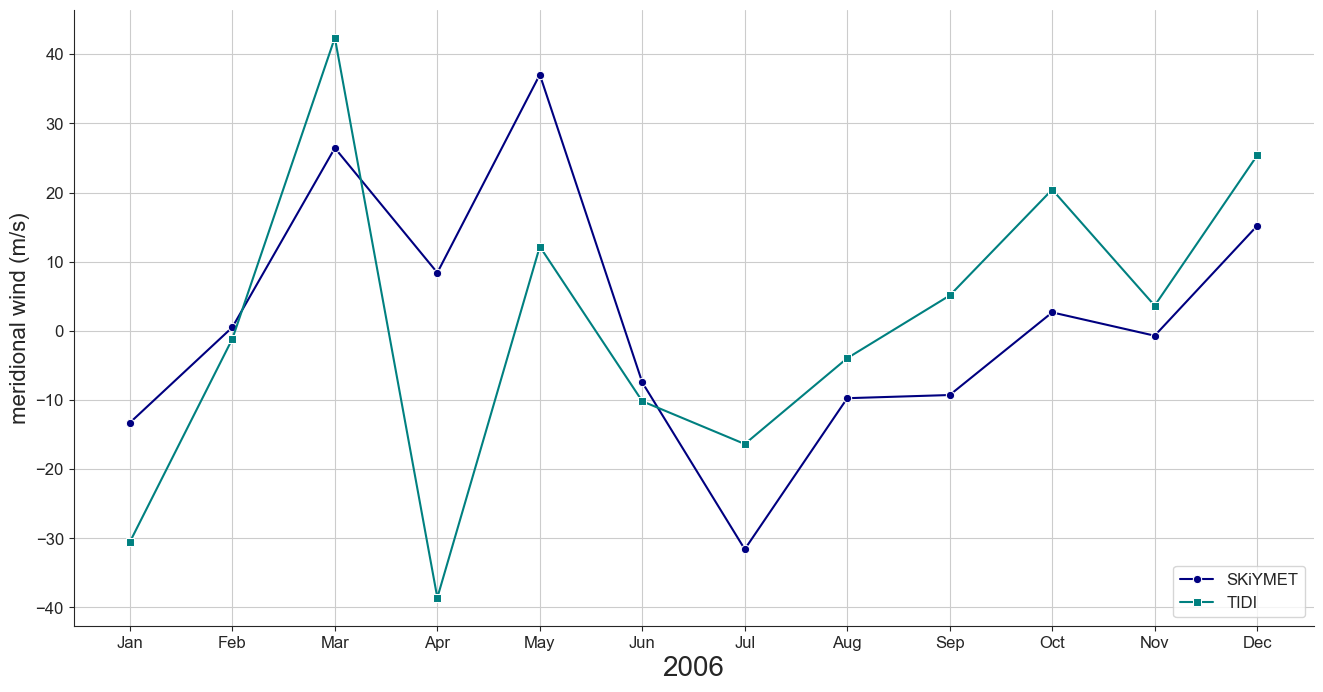

In [219]:
multiline_plot_winds(caminho_radar, caminho_tidi, '2006', 'meridional', 'comparacao_tidi_skiymet_meridional_2006')

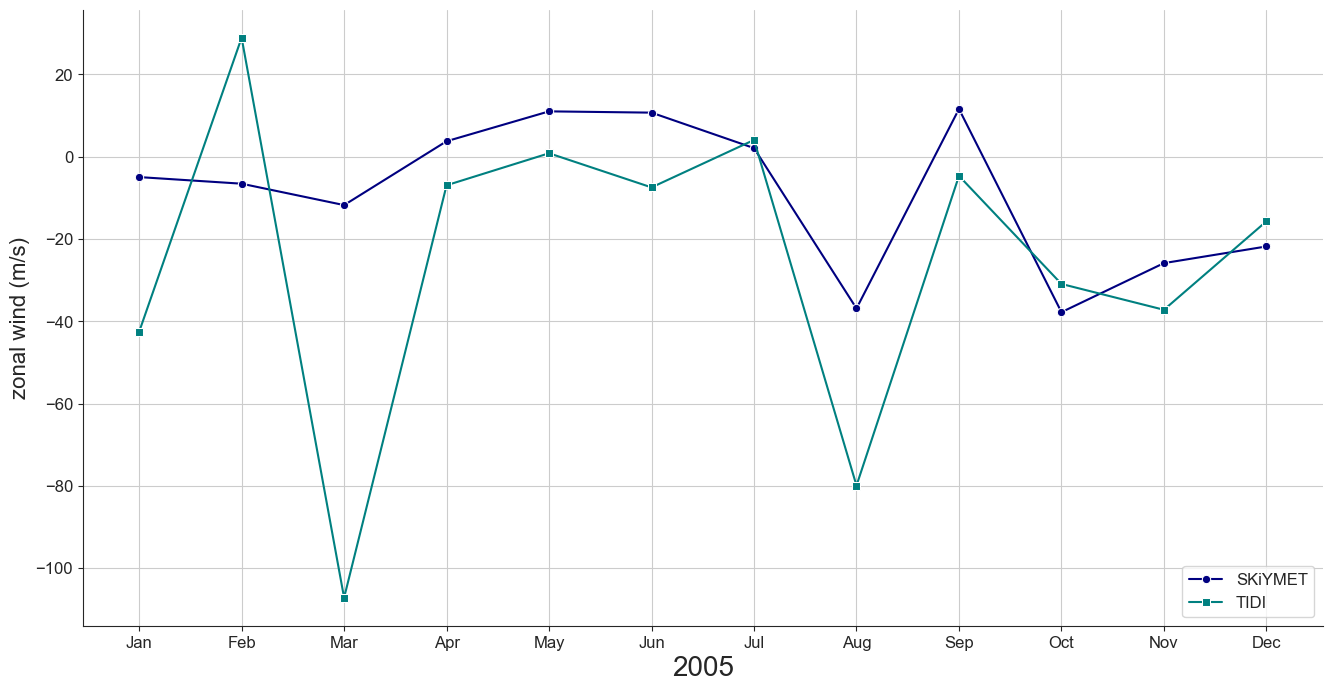

In [220]:
multiline_plot_winds(caminho_radar, caminho_tidi, '2005', 'zonal', 'comparacao_tidi_skiymet_zonal_2005')

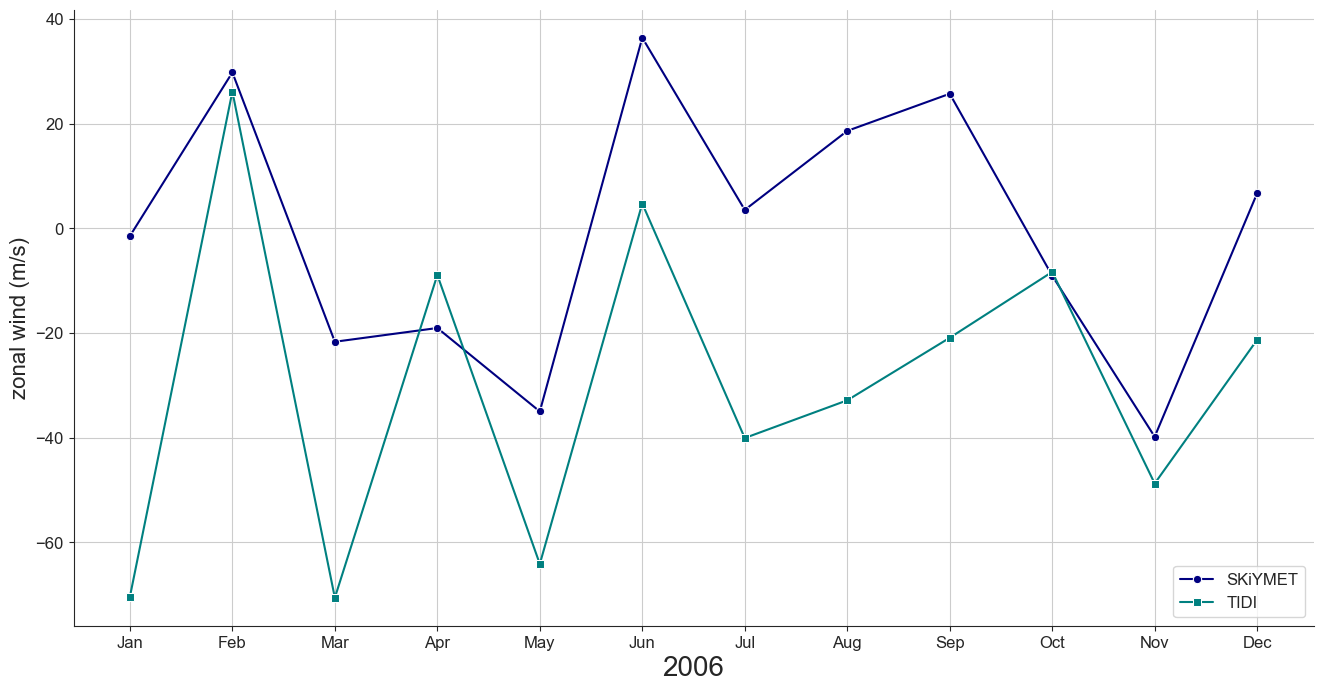

In [221]:
multiline_plot_winds(caminho_radar, caminho_tidi, '2006', 'zonal', 'comparacao_tidi_skiymet_zonal_2006')